<a href="https://colab.research.google.com/github/wo7864/Calligrapick/blob/master/load_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W0727 09:03:09.389138 140516587571072 deprecation.py:323] From <ipython-input-2-3633ed06af84>:10: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0727 09:03:09.391026 140516587571072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0727 09:03:09.399546 140516587571072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be remove

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ../../MNIST_data/train-images-idx3-ubyte.gz


W0727 09:03:09.816233 140516587571072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0727 09:03:09.819017 140516587571072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0727 09:03:09.910876 140516587571072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ../../MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../../MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../../MNIST_data/t10k-labels-idx1-ubyte.gz


W0727 09:03:10.317562 140516587571072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0727 09:03:10.985654 140516587571072 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


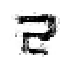

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
import cv2

z_dim = 100
X_dim = 784
y_dim = 1
h_dim = 128
c = 0
lr = 1e-3

def plot(samples):
    fig = plt.figure(figsize=(1, 1))
    gs = gridspec.GridSpec(1, 1)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        if i == 0:
            ax = plt.subplot(gs[i])
            plt.axis('off')
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_aspect('equal')
            plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

    return fig


def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)


# =============================== P(X|z) ======================================

P_W1 = tf.Variable(xavier_init([z_dim + y_dim, h_dim]))
P_b1 = tf.Variable(tf.zeros(shape=[h_dim]))

P_W2 = tf.Variable(xavier_init([h_dim, X_dim]))
P_b2 = tf.Variable(tf.zeros(shape=[X_dim]))


def P(z, c):
    inputs = tf.concat(axis=1, values=[z, c])
    h = tf.nn.relu(tf.matmul(inputs, P_W1) + P_b1)
    logits = tf.matmul(h, P_W2) + P_b2
    prob = tf.nn.sigmoid(logits)
    return prob, logits


# =============================== TRAINING ====================================
#z_mu, z_logvar = Q(X, c)
#z_sample = sample_z(z_mu, z_logvar)
#_, logits = P(z_sample, c)


# E[log P(X|z)]
#recon_loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=X), 1)
# D_KL(Q(z|X) || P(z|X)); calculate in closed form as both dist. are Gaussian
#kl_loss = 0.5 * tf.reduce_sum(tf.exp(z_logvar) + z_mu**2 - 1. - z_logvar, 1)
# VAE loss
#vae_loss = tf.reduce_mean(recon_loss + kl_loss)
#solver = tf.train.AdamOptimizer().minimize(vae_loss)



# Sampling from random z

X_samples, _ = P(z, c)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver =tf.train.Saver()
model_dir = 'gdrive/My Drive/model/ga.ckpt'
saver.restore(sess, model_dir)

y = np.zeros(shape=[1, y_dim])
y[:, np.random.randint(0, y_dim)] = 1.

z2 = '''0.79429238 0.4458658  0.85755222 0.72411167 0.60908454 0.21925395
 0.29081489 0.40935545 0.21938322 0.21406876 0.24366264 0.28571552
 0.38313599 0.63418172 0.88382467 0.39025575 0.54932936 0.63643637
 0.88218799 0.6796776  0.44285855 0.73247252 0.31841765 0.78487264
 0.55667516 0.58043064 0.90933945 0.20525132 0.54137437 0.58781489
 0.52204867 0.5442398  0.11939555 0.22597721 0.44852397 0.2207616
 0.86395074 0.75614974 0.37775391 0.2779469  0.47217661 0.72845538
 0.63269492 0.91515773 0.78684437 0.82391419 0.86145916 0.96186129
 0.06105211 0.71551837 0.06233188 0.23337387 0.43562393 0.53219842
 0.12421554 0.48974286 0.34979114 0.9164414  0.31436138 0.88690715
 0.77598529 0.38450996 0.62985588 0.24486764 0.97967897 0.97250807
 0.17464373 0.6200334  0.55200361 0.85205367 0.42365953 0.19859462
 0.42814393 0.85811298 0.91152527 0.91964546 0.80064463 0.29097411
 0.99875789 0.73967562 0.8257404  0.51071099 0.89387406 0.32876156
 0.2812403  0.59540485 0.54319335 0.72139561 0.86942942 0.22919761
 0.05111329 0.55750937 0.44789447 0.98834775 0.65900041 0.68059309
 0.16490245 0.24138536 0.23770803 0.1322071'''

z2 = z2.replace("\n","")
z2 = z2.replace("  "," ")
z2 = z2.replace("  "," ")
z2 = z2.replace("  "," ")
z2 = z2.replace("  "," ")
z2 = z2.replace("  "," ")
z2 = z2.replace("  "," ")


z2 = z2.split(" ")
z2 = [float(f) for f in z2 ]

z2 = np.array(z2)
z2 = z2.reshape(1, 100)
samples = sess.run(X_samples, feed_dict={z: z2, c: y})

fig = plot(samples)
plt.show()
plt.close(fig)
        
 

In [0]:
%cd ../../


/content


In [0]:
from google.colab import drive

drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
